## Import Libraries

In [1]:
import sys
sys.path.append("..") # so we can import espresso from the directory above.
import os

import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import bootstrap_contrast as bsc

import espresso as esp

/Users/josesho/anaconda3/envs/py3.6/lib/python3.6/site-packages/seaborn/apionly.py:6: UserWarning: As seaborn no longer sets a default style on import, the seaborn.apionly module is deprecated. It will be removed in a future version.
  warnings.warn(msg, UserWarning)


## Create Espresso Instances

In [2]:
data_folder='/Users/josesho/bin/git-repos/espresso/data'

mb312b_folder=os.path.join(data_folder,'by_genotype/MB312B')
mb213b_folder=os.path.join(data_folder,'by_genotype/MB213B')
starved_choice_folder=os.path.join(data_folder,'24-Hrs-starved-choice')

mb312b=esp.espresso(mb312b_folder)
mb213b=esp.espresso(mb213b_folder)
starved_choice=esp.espresso(starved_choice_folder)

## Plot Development

In [3]:
mb213b

4 feedlogs with a total of 120 flies.
3 genotypes ['w1118;MB213B-Gal4' 'MB213B-Gal4>UAS-TrpA1' 'w1118;UAS-TrpA1'].
2 temperatures [22 29].
2 foodtypes ['100mM_Sucrose' '100mM_Sucrose_100mM_Arabinose'].

(<matplotlib.figure.Figure at 0x112521630>,
                                      reference_group  \
 0           100mM_Sucrose; MB213B-Gal4>UAS-TrpA1; 22   
 1               100mM_Sucrose; w1118;MB213B-Gal4; 22   
 2                 100mM_Sucrose; w1118;UAS-TrpA1; 22   
 3  100mM_Sucrose_100mM_Arabinose; MB213B-Gal4>UAS...   
 4  100mM_Sucrose_100mM_Arabinose; w1118;MB213B-Ga...   
 5  100mM_Sucrose_100mM_Arabinose; w1118;UAS-TrpA1...   
 
                                   experimental_group  stat_summary  \
 0           100mM_Sucrose; MB213B-Gal4>UAS-TrpA1; 29      0.440972   
 1               100mM_Sucrose; w1118;MB213B-Gal4; 29      2.631461   
 2                 100mM_Sucrose; w1118;UAS-TrpA1; 29      0.802827   
 3  100mM_Sucrose_100mM_Arabinose; MB213B-Gal4>UAS...      1.081796   
 4  100mM_Sucrose_100mM_Arabinose; w1118;MB213B-Ga...      0.153050   
 5  100mM_Sucrose_100mM_Arabinose; w1118;UAS-TrpA1...      2.091567   
 
    bca_ci_low  bca_ci_high    ci  is_difference  is_pai

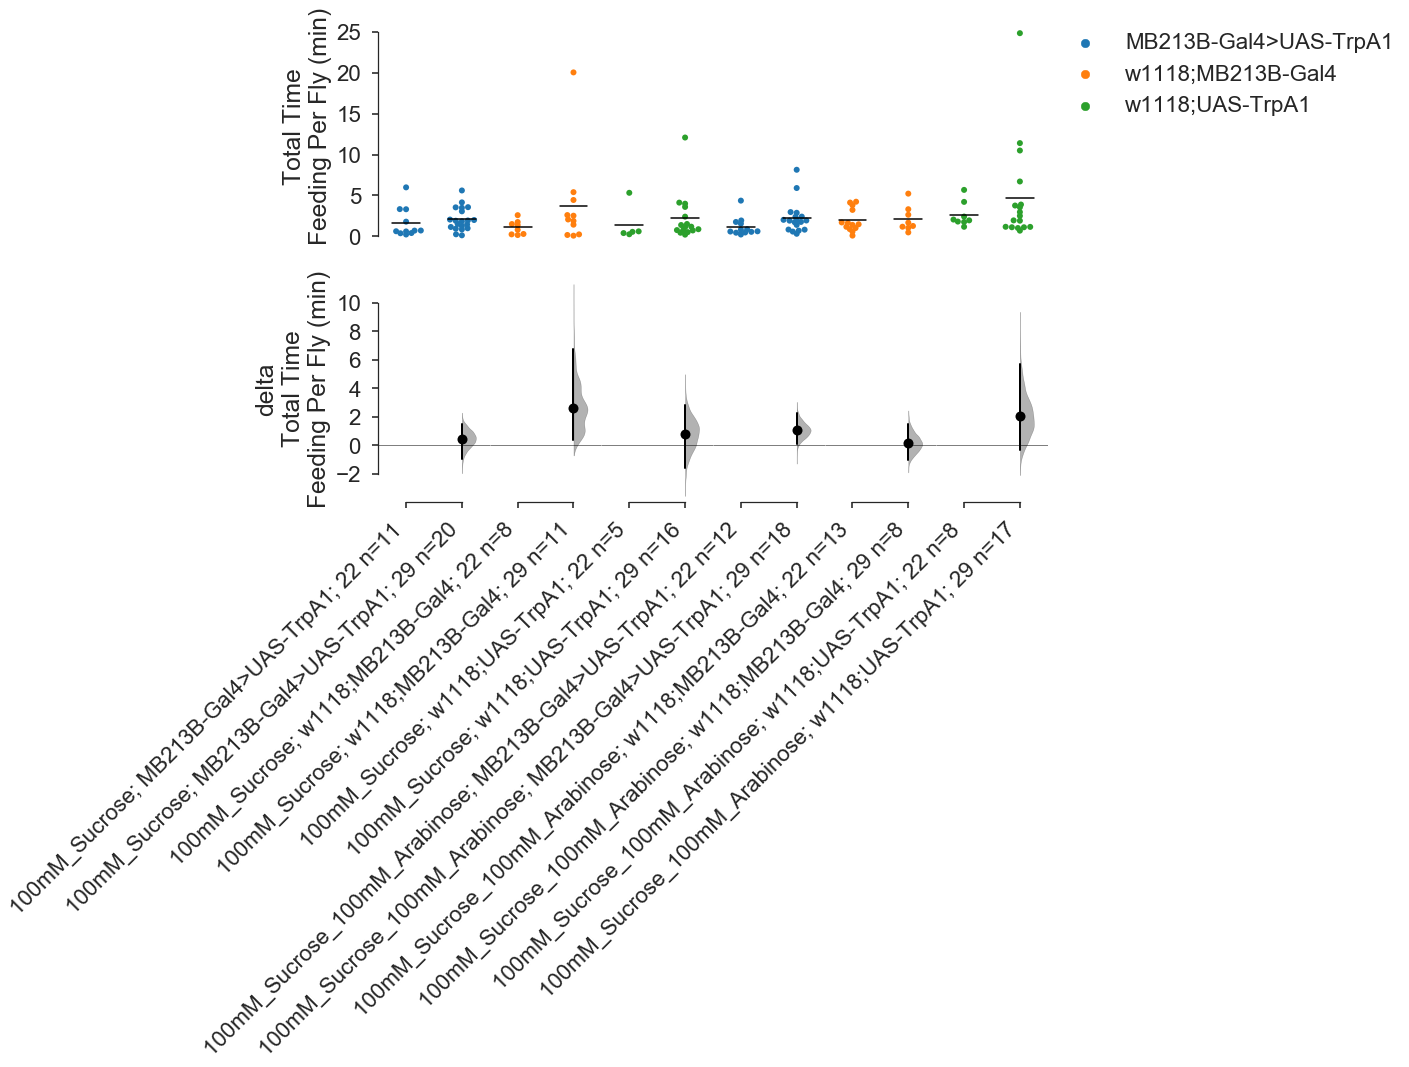

In [4]:
mb213b.plot.contrast.feed_count_per_fly(group_by=['FoodChoice','Genotype'],
                                        compare_by='Temperature')

In [4]:
group_by=['FoodChoice','Genotype']
compare_by='Temperature'
color_by='Temperature'

df=mb213b.feeds.copy()

for col in ['AverageFeedVolumePerFly_µl','FeedDuration_ms']:
    df[col].fillna(value=0,inplace=True)

for c in [compare_by,color_by]:
    esp._munger.check_column(c,df)
if len( df[compare_by].unique() )<2:
    raise ValueError('{} has less than 2 categories and cannot be used for `compare_by`.'.format(compare_by))

plot_df=pd.DataFrame(df[['FoodChoice', 'Genotype', 'Temperature','FlyID',
                         'AverageFeedCountPerFly',
                         'AverageFeedVolumePerFly_µl',
                         'FeedDuration_ms']]\
                            .groupby(['Temperature','Genotype','FoodChoice','FlyID'])\
                            .sum()\
                            .to_records() )\
            .dropna() # for some reason, groupby produces NaN rows
plot_df.reset_index(drop=True, inplace=True)
plot_df['FeedDuration_min']=plot_df['FeedDuration_ms']/60000
plot_df.rename(columns={'AverageFeedCountPerFly':'Total Feed Count\nPer Fly',
                       'AverageFeedVolumePerFly_µl':'Total Feed Volume\nPer Fly (µl)',
                       'FeedDuration_min':'Total Time\nFeeding Per Fly (min)'},
               inplace=True)        

plot_df=esp._munger.cat_categorical_columns(plot_df,group_by,compare_by)

# Properly arrange idx for grouping.
idx=[ tuple(i) for i in np.array_split( np.sort(plot_df.plot_groups_with_contrast.unique()), 
                                        len(plot_df.plot_groups.unique()) ) ]

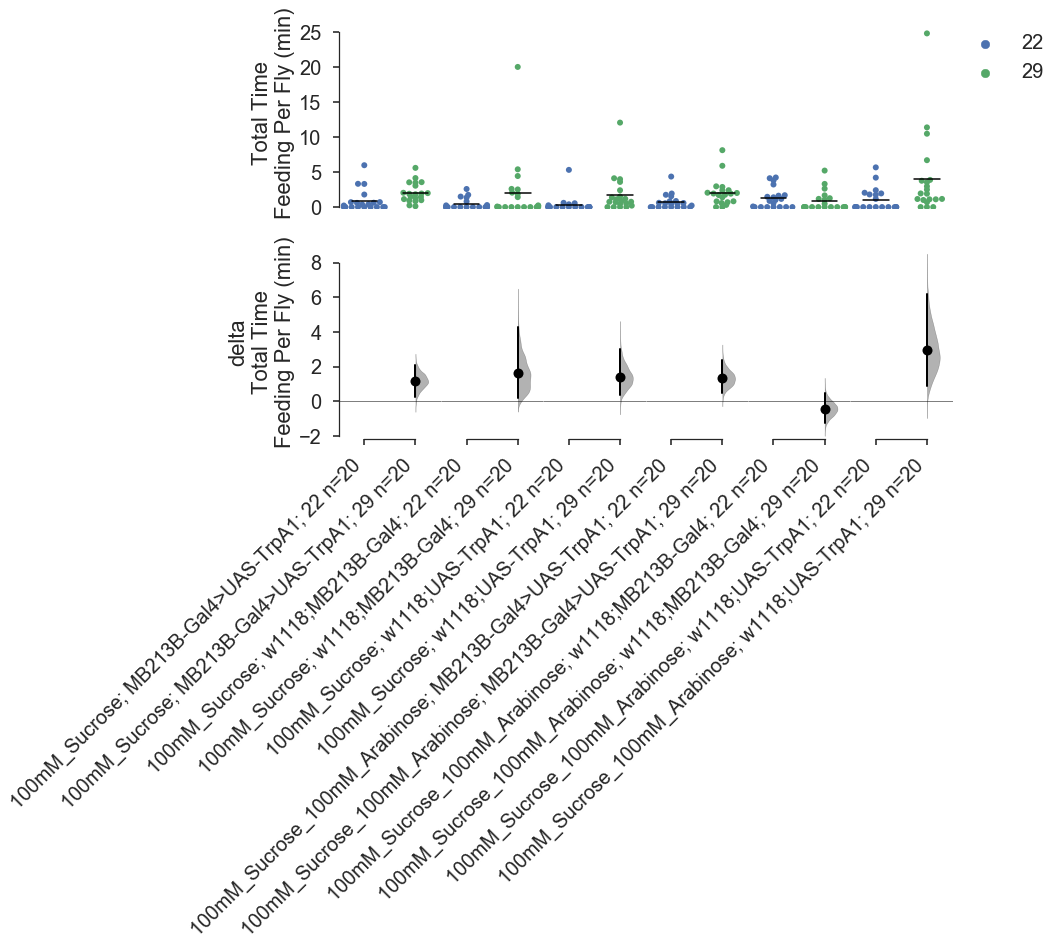

In [61]:
# yvar='Total Feed Count\nPer Fly'
# yvar='Total Feed Volume\nPer Fly'
yvar='Total Time\nFeeding Per Fly (min)'

# Make sure the ylims dont stretch below zero but still capture all the datapoints.
ymax=np.max(plot_df[yvar])*1.1

f,b=bsc.contrastplot(plot_df,
                     x='plot_groups_with_contrast',
                     y=yvar,
                     idx=idx,
                     color_col=color_by,
                     swarm_ylim=(-ymax/80,ymax),
                     float_contrast=False)

In [65]:
df[df.FlyID=='2017-02-24_12-05-01_Fly11']

,StartTime,StartFrame,FeedTubeIdx,FlyID,ChoiceIdx,AviFile,FeedVol_µl,FeedDuration_ms,Evap-mm3/s,Valid,...,Maximum Age,Tube1,Tube2,Temperature,FlyCountInChamber,AverageFeedVolumePerFly_µl,AverageFeedCountPerFly,AverageFeedSpeedPerFly_µl/s,FoodChoice,FeedLog_rawfile
213,NaN,NaN,0,2017-02-24_12-05-01_Fly11,0,NIL,NaN,0.0,NaN,False,...,7,100mM_Sucrose,100mM_Sucrose_100mM_Arabinose,22,1,0.0,0.0,NaN,100mM_Sucrose,FeedLog_2017-03-09_13-17-09_MB213B-Gal4-UAS-Tr...
215,NaN,NaN,1,2017-02-24_12-05-01_Fly11,1,NIL,NaN,0.0,NaN,False,...,7,100mM_Sucrose,100mM_Sucrose_100mM_Arabinose,22,1,0.0,0.0,NaN,100mM_Sucrose_100mM_Arabinose,FeedLog_2017-03-09_13-17-09_MB213B-Gal4-UAS-Tr...
214,NaN,NaN,0,2017-02-24_12-05-01_Fly11,0,NIL,NaN,0.0,NaN,False,...,7,100mM_Sucrose,100mM_Sucrose_100mM_Arabinose,22,1,0.0,0.0,NaN,100mM_Sucrose,FeedLog_2017-03-09_13-17-09_MB213B-Gal4-UAS-Tr...
216,NaN,NaN,1,2017-02-24_12-05-01_Fly11,1,NIL,NaN,0.0,NaN,False,...,7,100mM_Sucrose,100mM_Sucrose_100mM_Arabinose,22,1,0.0,0.0,NaN,100mM_Sucrose_100mM_Arabinose,FeedLog_2017-03-09_13-17-09_MB213B-Gal4-UAS-Tr...


In [69]:
latency=pd.DataFrame( df.dropna()\
                        [['FlyID','FoodChoice', 'Genotype', 'Temperature','RelativeTime_s']]\
                        .groupby(['FoodChoice', 'Genotype', 'Temperature','FlyID'])\
                        .min()\
                        .to_records() )\
        .dropna()
    
# create new categorical column.
latency['plot_groups']=esp._munger.join_cols(latency,group_by)
# add compare_by to the group_by list.
gby=group_by.copy()
gby.append(compare_by)
# Create another categorical column.
plot_df['plot_groups_with_contrast']=esp._munger.join_cols(plot_df,gby)

# Properly arrange idx for grouping.
idx=[ tuple(i) for i in np.array_split( np.sort(plot_df.plot_groups_with_contrast.unique()), 
                                        len(plot_df.plot_groups.unique()) ) ]

147


,FoodChoice,Genotype,Temperature,FlyID,RelativeTime_s


In [ ]:
f,b=bsc.contrastplot(latency,
                     x='plot_groups_with_contrast',
                     y=yvar,
                     idx=idx,
                     color_col=color_by,
                     swarm_ylim=(-ymax/80,ymax),
                     float_contrast=False)